In [1]:
import pandas as pd
import matplotlib.pyplot as plt

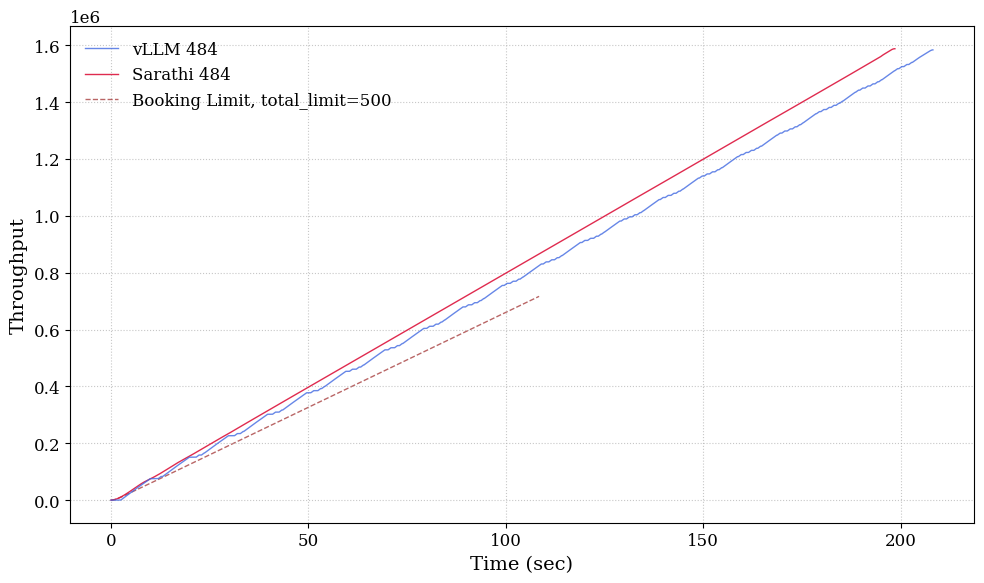

<Figure size 640x480 with 0 Axes>

In [2]:
vllm_df = pd.read_csv('throughput_vllm_484.csv')
booking_df = pd.read_csv('throughput_booking_limit_500.csv')
sarathi_df = pd.read_csv('throughput_sarathi_484.csv')

# 设置全局字体为Serif
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

# 创建画布
plt.figure(figsize=(10, 6))

T = 500
# 绘制曲线
vllm_subset = vllm_df[vllm_df['Time (sec)'] <= T]
sarathi_subset = sarathi_df[sarathi_df['Time (sec)'] <= T]
booking_subset = booking_df[booking_df['Time (sec)'] <= T]

# 画图
plt.plot(vllm_subset['Time (sec)'], vllm_subset['throughput'], 
         color='royalblue', linestyle='-', linewidth=1, alpha=0.8, label='vLLM 484', zorder=3)

plt.plot(sarathi_subset['Time (sec)'], sarathi_subset['throughput'], 
         color='crimson', linestyle='-',  linewidth=1, alpha=0.9, label='Sarathi 484', zorder=2)

plt.plot(booking_subset['Time (sec)'], booking_subset['throughput'], 
         color='darkred', linestyle='--',  linewidth=1, alpha=0.6, label='Booking Limit, total_limit=500', zorder=1)

# 添加标签和图例
plt.xlabel('Time (sec)', fontsize=14)
plt.ylabel('Throughput', fontsize=14)
plt.legend(frameon=False, fontsize=12)

# 设置坐标轴格式
plt.grid(True, linestyle=':', alpha=0.7)
plt.ticklabel_format(axis='x', style='plain')  # 禁用科学计数法
plt.tight_layout()

# 显示图形
plt.show()
plt.savefig('throughput_comparison.png', dpi=300, bbox_inches='tight')

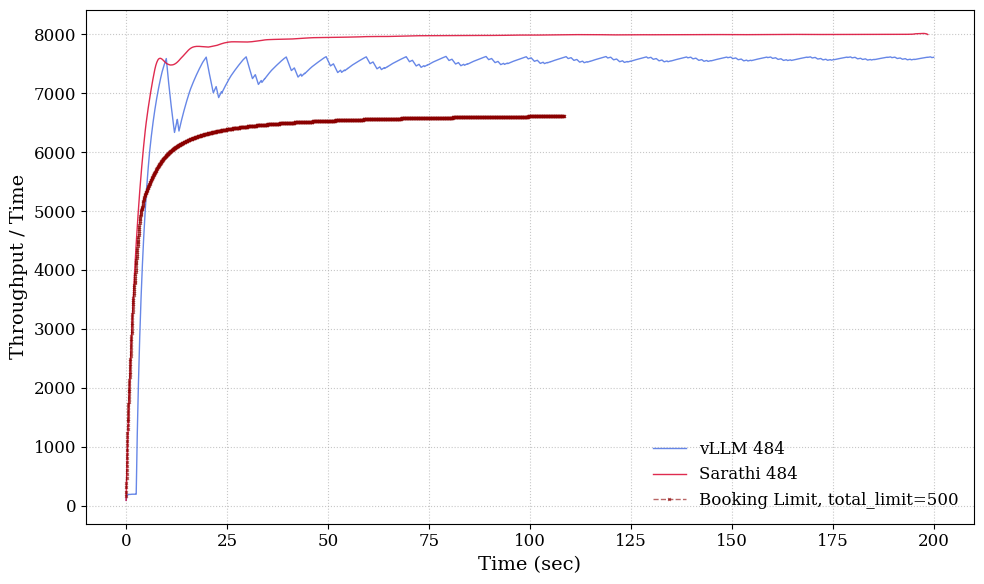

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
vllm_df = pd.read_csv('throughput_vllm_484.csv')
booking_df = pd.read_csv('throughput_booking_limit_500.csv')
sarathi_df = pd.read_csv('throughput_sarathi_484.csv')

# 设置最大时间
T = 200
vllm_subset = vllm_df[vllm_df['Time (sec)'] <= T].copy()
sarathi_subset = sarathi_df[sarathi_df['Time (sec)'] <= T].copy()
booking_subset = booking_df[booking_df['Time (sec)'] <= T].copy()

# 计算 throughput / time
vllm_subset['throughput_per_time'] = vllm_subset['throughput'] / vllm_subset['Time (sec)']
sarathi_subset['throughput_per_time'] = sarathi_subset['throughput'] / sarathi_subset['Time (sec)']
booking_subset['throughput_per_time'] = booking_subset['throughput'] / booking_subset['Time (sec)']

# 画图
plt.figure(figsize=(10, 6))
plt.plot(vllm_subset['Time (sec)'], vllm_subset['throughput_per_time'], 
         color='royalblue', linestyle='-', linewidth=1, alpha=0.8, label='vLLM 484')

plt.plot(sarathi_subset['Time (sec)'], sarathi_subset['throughput_per_time'], 
         color='crimson', linestyle='-', linewidth=1, alpha=0.9, label='Sarathi 484')

plt.plot(booking_subset['Time (sec)'], booking_subset['throughput_per_time'], 
         color='darkred', linestyle='--', marker='x', markersize=2, linewidth=1, alpha=0.6, label='Booking Limit, total_limit=500')

# 设置标签和图例
plt.xlabel('Time (sec)', fontsize=14)
plt.ylabel('Throughput / Time', fontsize=14)
plt.legend(frameon=False, fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.ticklabel_format(axis='x', style='plain')  # 禁用科学计数法
plt.tight_layout()

# 显示图形
plt.show()